# Imports

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt

# Download Data

In [3]:
!kaggle competitions download -c 'spaceship-titanic'

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
path_to_zip_file = os.getcwd() + '/' + 'spaceship-titanic' + '.zip'
directory_to_extract_to = os.getcwd() + '/' + 'spaceship-titanic'

In [5]:
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

# Datasets

In [6]:
dfs = list()

In [7]:
class Dataset:
    def __init__(self, X_train, X_test, y_train, y_test, name):
        self.name = name
        self.X_train = X_train.copy()
        self.y_train = y_train.copy()
        self.X_test  = X_test.copy()
        self.y_test  = y_test.copy()
        self.scores = dict()
        self.cm = dict()

In [8]:
def ohe_dataset(cat_vars, data):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe_data = pd.DataFrame(ohe.fit_transform(data[cat_vars]).toarray())
    ohe_data.columns = ohe.get_feature_names_out()
    data = data.reset_index(drop=True)
    final_data = pd.concat([data, ohe_data], axis=1)
    final_data = final_data.drop(columns=cat_vars)
    return final_data

In [9]:
def train_test_split_titanic(data):
    X = data.drop(columns=['Transported'])
    y = data['Transported']
    return train_test_split(X, y, test_size=0.25, random_state=42)  

## All columns dataset

In [10]:
data = pd.read_csv(directory_to_extract_to + '/train.csv')

In [11]:
num_vals = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side','FirstName', 'SurName']

In [12]:
data[['Deck', 'CabinNumber', 'Side']] = data['Cabin'].str.split('/', expand=True)
data[['FirstName', 'SurName']] = data['Name'].str.split(' ', expand=True)
data.drop(columns=['Cabin','PassengerId','Name'], inplace=True)
data[cat_vars] = data[cat_vars].replace(np.nan, 'Missing')
data.dropna(inplace=True)
data[cat_vars] = data[cat_vars].astype(str)

In [13]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,Side,FirstName,SurName
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Willy,Santantines


In [14]:
X_train, X_test, y_train, y_test = train_test_split_titanic(ohe_dataset(cat_vars, data))
dfs.append(Dataset(X_train, X_test, y_train, y_test, 'all_columns'))

## One columns dataset

In [15]:
data = pd.read_csv(directory_to_extract_to + '/train.csv')

In [16]:
num_vals = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side','FirstName']

In [17]:
data[['Deck', 'CabinNumber', 'Side']] = data['Cabin'].str.split('/', expand=True)
data[['FirstName', 'SurName']] = data['Name'].str.split(' ', expand=True)
data.drop(columns=['Cabin','PassengerId','Name','SurName'], inplace=True)
data[cat_vars] = data[cat_vars].replace(np.nan, 'Missing')
data.dropna(inplace=True)
data[cat_vars] = data[cat_vars].astype(str)

In [18]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,Side,FirstName
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Maham
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Juanna
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Altark
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Solam
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Willy


In [19]:
X_train, X_test, y_train, y_test = train_test_split_titanic(ohe_dataset(cat_vars, data))
dfs.append(Dataset(X_train, X_test, y_train, y_test, 'just_first_name_column'))

## No columns dataset

In [20]:
data = pd.read_csv(directory_to_extract_to + '/train.csv')

In [21]:
num_vals = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

In [22]:
data[['Deck', 'CabinNumber', 'Side']] = data['Cabin'].str.split('/', expand=True)
data.drop(columns=['Cabin','PassengerId','Name'], inplace=True)
data[cat_vars] = data[cat_vars].replace(np.nan, 'Missing')
data.dropna(inplace=True)
data[cat_vars] = data[cat_vars].astype(str)

In [23]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [24]:
X_train, X_test, y_train, y_test = train_test_split_titanic(ohe_dataset(cat_vars, data))
dfs.append(Dataset(X_train, X_test, y_train, y_test, 'no_columns'))

## TotalSpent dataset

In [25]:
data = pd.read_csv(directory_to_extract_to + '/train.csv')

In [26]:
num_vals = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpent']
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

In [27]:
data[['Deck', 'CabinNumber', 'Side']] = data['Cabin'].str.split('/', expand=True)
data['TotalSpent'] = data['RoomService']+data['FoodCourt']+data['ShoppingMall']+data['Spa']+data['VRDeck']
data.drop(columns=['Cabin','PassengerId','Name'], inplace=True)
data[cat_vars] = data[cat_vars].replace(np.nan, 'Missing')
data.dropna(inplace=True)
data[cat_vars] = data[cat_vars].astype(str)

In [28]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,Side,TotalSpent
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1091.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split_titanic(ohe_dataset(cat_vars, data))
dfs.append(Dataset(X_train, X_test, y_train, y_test, 'total_spent'))

## AverageSpent dataset

In [30]:
data = pd.read_csv(directory_to_extract_to + '/train.csv')

In [31]:
num_vals = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

In [32]:
data[['Deck', 'CabinNumber', 'Side']] = data['Cabin'].str.split('/', expand=True)
for var in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    data[var] = data[var]/(data['RoomService']+data['FoodCourt']+data['ShoppingMall']+data['Spa']+data['VRDeck'])
data.drop(columns=['Cabin','PassengerId','Name'], inplace=True)
data[cat_vars] = data[cat_vars].replace(np.nan, 'Missing')
data.dropna(inplace=True)
data[cat_vars] = data[cat_vars].astype(str)

In [33]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,Side
1,Earth,False,TRAPPIST-1e,24.0,False,0.148098,0.014351,0.040442,0.925484,0.974996,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,0.004141,0.345841,0.000000,0.992704,0.973329,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.000000,0.247875,0.095293,0.945110,0.993369,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,0.277727,0.088801,0.210199,0.995460,0.559881,True,F,1,S
5,Earth,False,PSO J318.5-22,44.0,False,0.000000,0.624031,0.000000,0.997860,0.000000,True,F,0,P


In [34]:
X_train, X_test, y_train, y_test = train_test_split_titanic(ohe_dataset(cat_vars, data))
dfs.append(Dataset(X_train, X_test, y_train, y_test, 'average_spent'))

# Power Transforms dataset

In [35]:
data = pd.read_csv(directory_to_extract_to + '/train.csv')

In [36]:
num_vals = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

In [37]:
data[['Deck', 'CabinNumber', 'Side']] = data['Cabin'].str.split('/', expand=True)
data.drop(columns=['Cabin','PassengerId','Name'], inplace=True)
data[cat_vars] = data[cat_vars].replace(np.nan, 'Missing')
data.dropna(inplace=True)
data[cat_vars] = data[cat_vars].astype(str)

In [38]:
X_train, X_test, y_train, y_test = train_test_split_titanic(ohe_dataset(cat_vars, data))

In [39]:
for var in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    X_train[var], param = stats.yeojohnson(X_train[var])
    X_test[var] = stats.yeojohnson(X_test[var], lmbda=param)
    print(var)
    print(param)
    print()

RoomService
-0.42734098535192505

FoodCourt
-0.37495890147965627

ShoppingMall
-0.4784129568363197

Spa
-0.378622015712443

VRDeck
-0.405089875741121



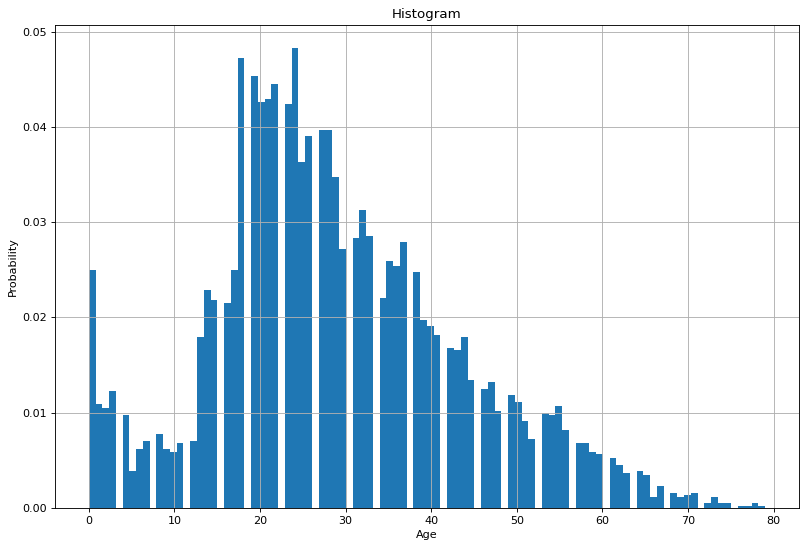

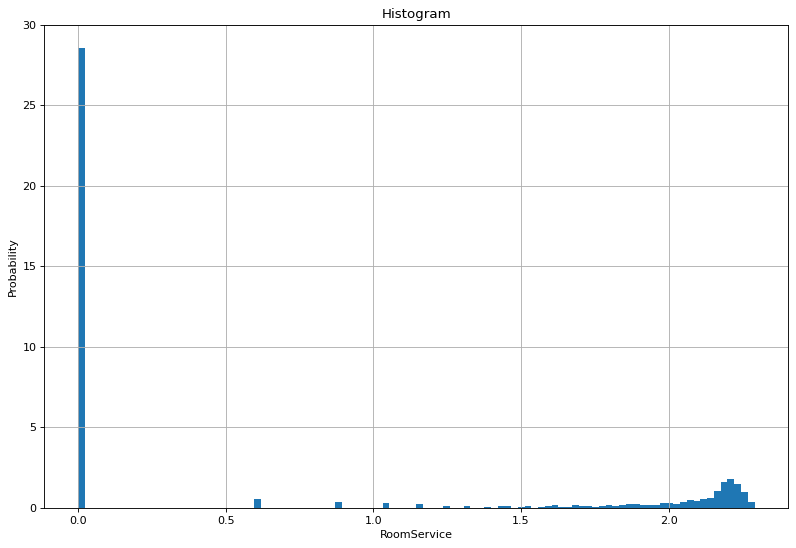

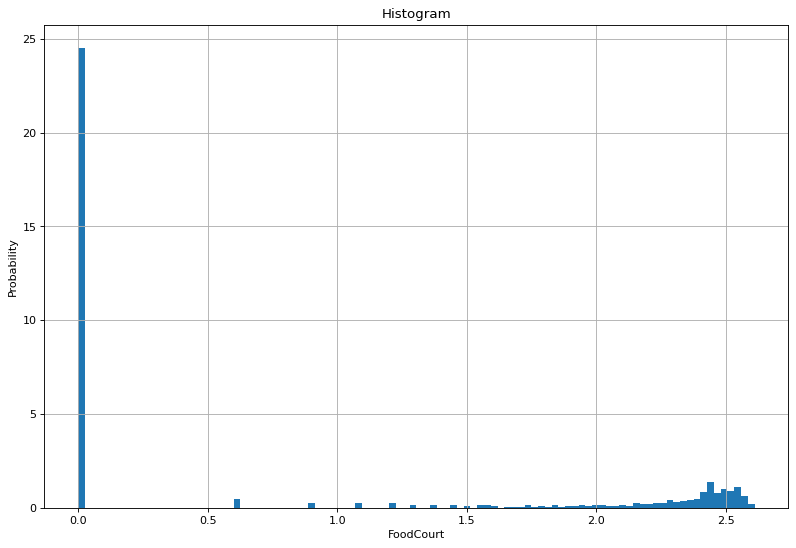

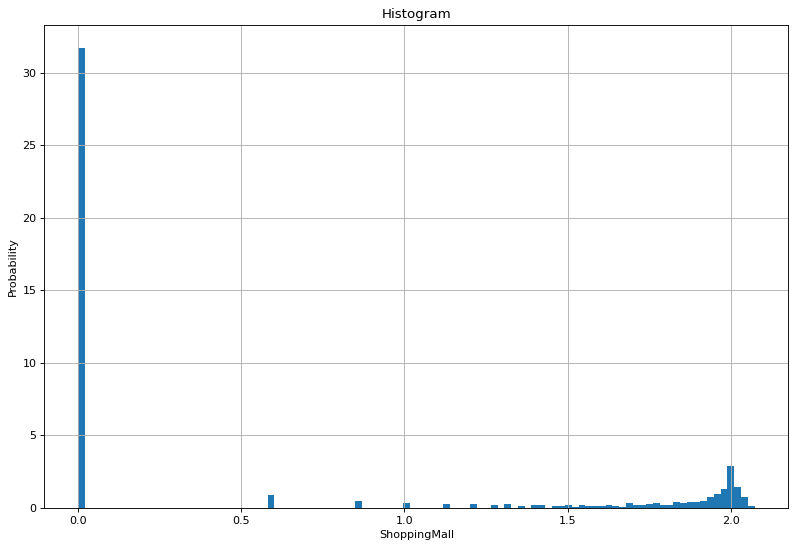

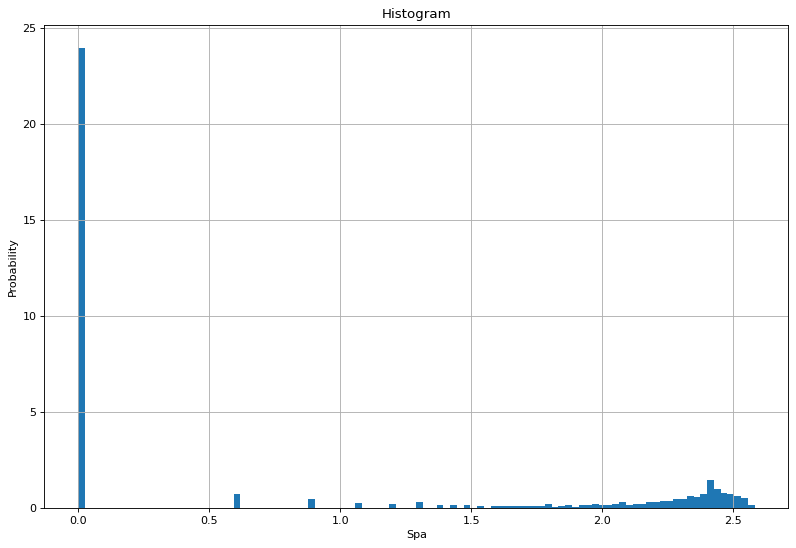

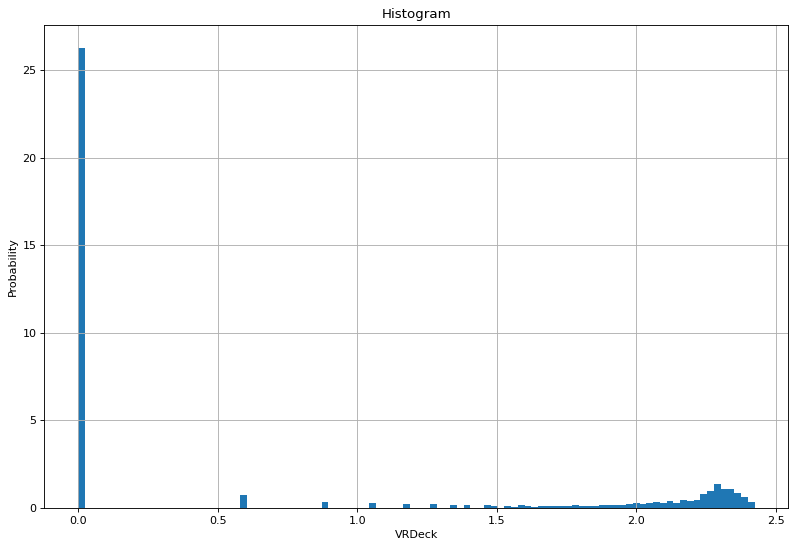

In [40]:
for var in num_vals:
    # the histogram of the data
    plt.figure(figsize=(12, 8), dpi=80)
    X_train[var].hist(bins = 100, density=True)
    plt.xlabel(var)
    plt.ylabel('Probability')
    plt.title('Histogram')
    plt.grid(True)
    plt.show()

In [41]:
dfs.append(Dataset(X_train, X_test, y_train, y_test, 'log_transform'))

# Binarize dataset

In [42]:
data = pd.read_csv(directory_to_extract_to + '/train.csv')

In [43]:
num_vals = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

In [44]:
data[['Deck', 'CabinNumber', 'Side']] = data['Cabin'].str.split('/', expand=True)
data.drop(columns=['Cabin','PassengerId','Name'], inplace=True)
data[cat_vars] = data[cat_vars].replace(np.nan, 'Missing')
data.dropna(inplace=True)
data[cat_vars] = data[cat_vars].astype(str)

In [45]:
X_train, X_test, y_train, y_test = train_test_split_titanic(ohe_dataset(cat_vars, data))

In [46]:
skewed = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for var in skewed:    
    # map the variable values into 0 and 1
    X_train[var] = np.where(X_train[var]==0, 0, 1)
    X_test[var] = np.where(X_test[var]==0, 0, 1)

In [47]:
dfs.append(Dataset(X_train, X_test, y_train, y_test, 'binarized'))

# Categorical Encoding

In [48]:
# TO DO:
#  Categorical Encoding
#  Feature Scaling

# Models Loop

In [49]:
[df.name for df in dfs]

['all_columns',
 'just_first_name_column',
 'no_columns',
 'total_spent',
 'average_spent',
 'log_transform',
 'binarized']

In [50]:
for df in dfs:
    print('Dataset', df.name, 'is training')
    X_train = df.X_train
    y_train = df.y_train
    X_test  = df.X_test
    y_test  = df.y_test
    scores = dict()

    scores['lr'] = LogisticRegression(max_iter=100000).fit(X_train, y_train).score(X_test, y_test)
    scores['dt'] = DecisionTreeClassifier().fit(X_train, y_train).score(X_test, y_test)
    scores['gnb'] = GaussianNB().fit(X_train, y_train).score(X_test, y_test)
    scores['svm'] = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train).score(X_test, y_test)
    scores['gb']  = GradientBoostingClassifier().fit(X_train, y_train).score(X_test, y_test)
    scores['rf']  = RandomForestClassifier().fit(X_train, y_train).score(X_test, y_test)
    scores['knn'] = KNeighborsClassifier().fit(X_train, y_train).score(X_test, y_test)
    df.scores = scores.copy()
    print()

Dataset all_columns is training

Dataset just_first_name_column is training

Dataset no_columns is training

Dataset total_spent is training

Dataset average_spent is training

Dataset log_transform is training

Dataset binarized is training



In [51]:
for df in dfs:
    print('Dataset:', df.name)
    for key, value in df.scores.items():
        print('Model:', key, 'Accuracy:', value)
    print()

del dfs

Dataset: all_columns
Model: lr Accuracy: 0.7931219774314885
Model: dt Accuracy: 0.7662547017732402
Model: gnb Accuracy: 0.630843632455669
Model: svm Accuracy: 0.6286942504030091
Model: gb Accuracy: 0.8070929607737776
Model: rf Accuracy: 0.7984954325631382
Model: knn Accuracy: 0.7743148844707146

Dataset: just_first_name_column
Model: lr Accuracy: 0.7877485222998388
Model: dt Accuracy: 0.7743148844707146
Model: gnb Accuracy: 0.6496507254164428
Model: svm Accuracy: 0.629768941429339
Model: gb Accuracy: 0.8081676518001075
Model: rf Accuracy: 0.8054809242342826
Model: knn Accuracy: 0.7743148844707146

Dataset: no_columns
Model: lr Accuracy: 0.7893605588393336
Model: dt Accuracy: 0.7458355722729715
Model: gnb Accuracy: 0.7608812466415905
Model: svm Accuracy: 0.7979580870499732
Model: gb Accuracy: 0.814615797958087
Model: rf Accuracy: 0.8049435787211177
Model: knn Accuracy: 0.7743148844707146

Dataset: total_spent
Model: lr Accuracy: 0.7877485222998388
Model: dt Accuracy: 0.7420741536808168
